# Основы машинного обучения 
## Проектная работа

## Содержание <a id='content'></a>
   1. [Описание](#description)
   2. [Шаг 1. Знакомство с данными](#preparation)
   3. [Шаг 2. Исследовательский анализ данных (EDA)](#eda)
   4. [2.1 Изучение датасета](#describe)
   5. [2.2 Графики](#graphs)
   6. [2.3 Матрица корреляций](#corr)
   7. [Шаг 3. Модель прогонозирования оттока пользователей](#model)
   8. [3.1 Обучение модели](#teaching)
   9. [3.2 Оценка метрик](#metrics)
   10. [Шаг 4. Кластеризация пользователей](#clustering)
   11. [4.1 Дендрограмма](#linkagematrix)
   12. [4.2 Обучение модели кластеризации](#kmeans)
   13. [4.3 Кластеры](#clusters)
   13. [4.4 Отток по кластерам](#clusterchurn)
   14. [Шаг 5. Вывод](#summary)

## Описание <a id="description"></a>

Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с пользователями на основе аналитических данных. Задача — провести анализ анкет пользователей и подготовить план действий по удержанию клиентов.
Цели:
- научиться прогнозировать вероятность оттока клиента;
- сформировать типичные портреты пользователей: выделить наиболее яркие группы и их характеристики;
- проанализировать основные признаки, влияющие на отток пользователей;
- сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:
    - целевые группы
    - меры по снижению оттока
    - особенности взаимодействия с клиентами

## Шаг 1. Знакомство с данными <a id="preparation"></a>

Импортируем необходимые библиотеки и посмотрим на содержимое датасета.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('/datasets/gym_churn.csv')
data.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [ ]:
print('Дублирующиеся значения: {}'.format(data.duplicated().sum()))

Дублирующиеся значения: 0


In [ ]:
print('Размер датасета:', data.shape)

Размер датасета: (4000, 14)


В датафрейме 14 столбцов, 4000 строк. Пропусков и дубликатов нет, 4 из столбцов с вещественными, остальные - с целыми числами.
Приведем названия столбцов к нижнему регистру для соответствия "змеиному" стилю.

In [ ]:
data.columns = data.columns.str.lower()

## Шаг 2. Исследовательский анализ данных (EDA) <a id="eda"></a>

### 2.1 Изучение датасета <a id="describe"></a>

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
near_location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000


Мы видим, что в части столбцов значения бинарные - 1 или 0, а в других вещественные.

Мужчин и женщин среди клиентов почти поровну, большинство живут близко к клубу, чуть меньше половины занимаются через партнеров. Около 30% пришли через друга, номера телефонов оставляют почти все. Возраст клиентов - от 18 до 41 года, в среднем - 29 лет.

В среднем контракты заключены на 4-5 месяцев, у большинства - на 1 месяц, а наибольший срок - год. На срок от полугода до года заключены договоры у четверти клиентов. У большинства клиентов до конца договора остался месяц, у четверти - от полугода до года. В среднем клиенты обратились в клуб 3 месяца назад, а дольше всего клуб посещает клиент, обратившийся 31 месяц назад. 

Групповые занятия посещают меньше половины клиентов, а в среднем посещают клуб 1-2 раза в неделю. Только четверть клиентов посещает клуб чаще 2-3 раз в неделю, а максимальное число посещений в неделю - 6. За предыдущий месяц значения схожи.

На дополнительные услуги посетители тратят до 550, в среднем - 146.

Подозрительным кажется небольшое число лояльных клиентов, посещающих спортклуб дольше полугода, а также чаще 2 раз в неделю.

Посмотрим средние значения по признакам для ушедших и оставшихся клиентов.

In [ ]:
data.groupby('churn').mean().T

churn,0,1
gender,0.510037,0.510839
near_location,0.873086,0.768143
partner,0.534195,0.355325
promo_friends,0.353522,0.183789
phone,0.903709,0.902922
contract_period,5.747193,1.728558
group_visits,0.464103,0.268615
age,29.976523,26.989632
avg_additional_charges_total,158.445715,115.082899
month_to_end_contract,5.283089,1.662582


Здесь значения объяснимы - чаще уходят клиенты, живущие дальше, пришедшие не через друзей или партнера, не оставившие номер телефона и с более коротким сроком действия договора. Такие клиенты также моложе, реже посещают групповые занятия и спортклуб в целом, меньше тратят на дополнительные услуги и не так давно начали ходить в этот зал.

### 2.2 Графики <a id="graphs"></a>

Разделим столбцы на те с бинарным значением (0 или 1) и прочие.

In [ ]:
bool_columns = []
regular_columns = []
for i in data.columns:
    if i == 'churn': continue
    if (data[i].max() == 1 ) & (data[i].min() == 0):
        bool_columns.append(i)
    else:
        regular_columns.append(i)
print('Бинарные колонки:', bool_columns)
print('Небинарные колонки:', regular_columns)

Бинарные колонки: ['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'group_visits']
Небинарные колонки: ['contract_period', 'age', 'avg_additional_charges_total', 'month_to_end_contract', 'lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month']


Построим графики с накоплением для колонок с бинарными значениями и графики распределения для прочих.

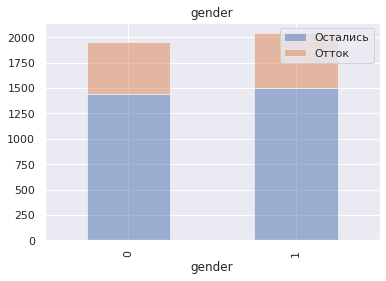

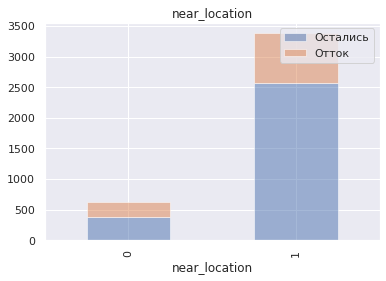

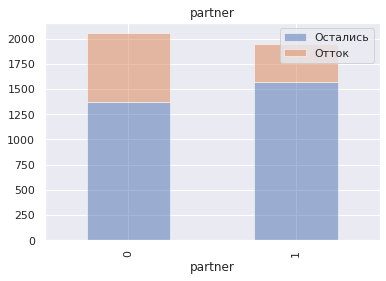

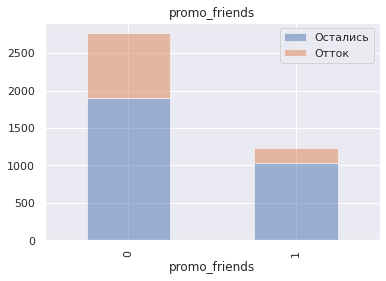

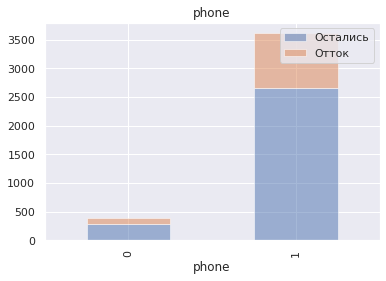

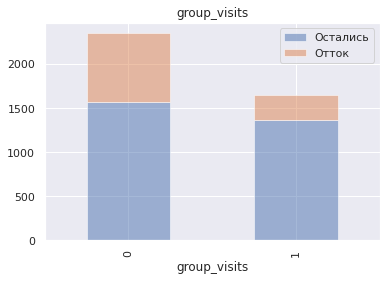

In [ ]:
for column in bool_columns:
    report = data.copy().reset_index().pivot_table(index = column, columns= data['churn'], values='index', aggfunc='count' )
    report.plot(kind='bar', stacked=True, alpha=0.5, title=column).legend(['Остались', 'Отток'], loc='upper right')

Графики подтверждают вышеуказанные выводы: пол не оказывает особого влияния, большинство клиентов живут неподалеку, но относительный отток больше у тех, кто живет дальше, клиенты, пришедшие через компанию-партнера или по рекомендации друга, уходят реже.
Посмотрим графики распределения.

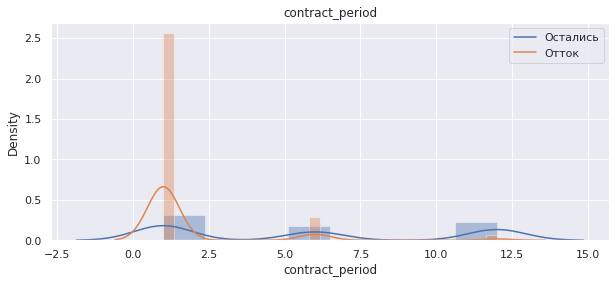

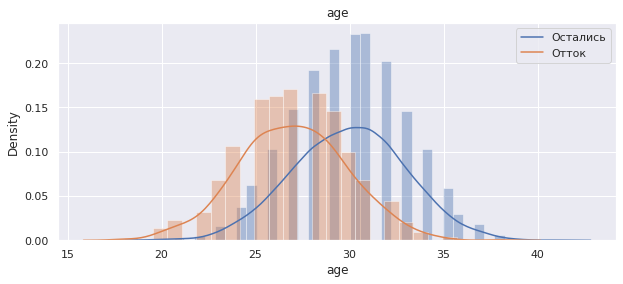

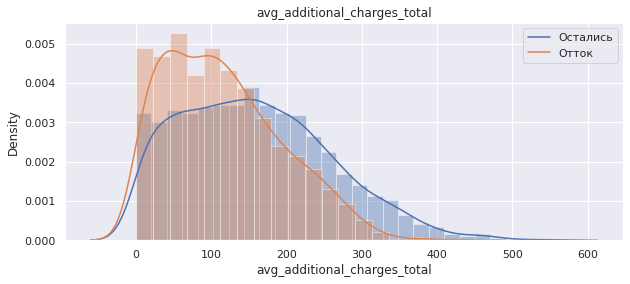

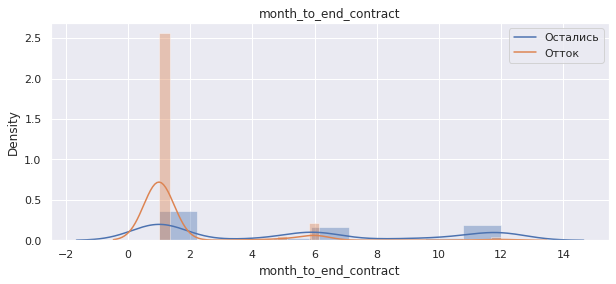

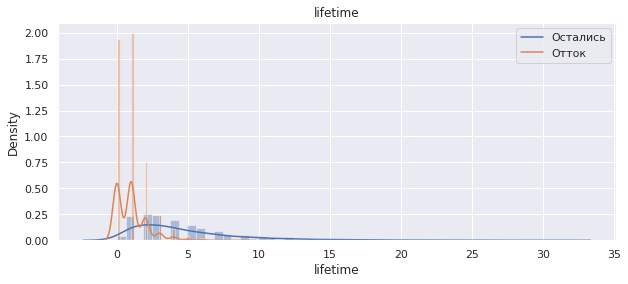

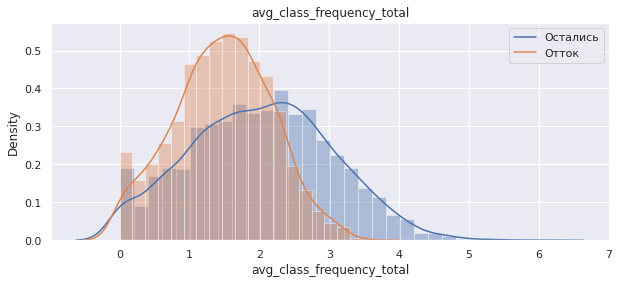

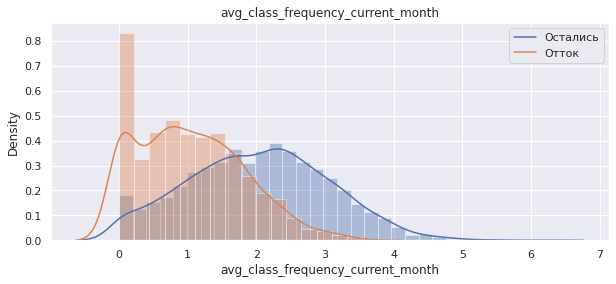

In [ ]:
for column in regular_columns: 
    plt.figure(figsize=(10,4)) 
    plt.title(column)
    sns.distplot(data[data['churn'] == 0][column])
    sns.distplot(data[data['churn'] == 1][column])
    plt.legend(['Остались', 'Отток'])
    plt.show()

Выводы схожи - чаще всего уходят клиенты с договором длительностью 1 месяц и посещающие клуб меньше 2-3 месяцев реже 2 раз в неделю. Для подтверждения выводов построим еще и матрицу корреляций.

### 2.3 Матрица корреляций <a id="corr"></a>

In [ ]:
corr_m = data.corr()
corr_m

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
gender,1.000000,0.006699,-0.010463,-0.005033,-0.008542,0.000502,0.017879,0.013807,-0.009334,-0.001281,0.013579,0.014620,0.009156,0.000708
near_location,0.006699,1.000000,-0.005119,0.210964,-0.015763,0.150233,0.154728,0.058358,0.040761,0.143961,0.070921,0.043127,0.062664,-0.128098
partner,-0.010463,-0.005119,1.000000,0.451960,0.009970,0.306166,0.022710,0.047480,0.022941,0.294632,0.061229,0.024938,0.045561,-0.157986
promo_friends,-0.005033,0.210964,0.451960,1.000000,0.001982,0.244552,0.120170,0.050113,0.036898,0.239553,0.072721,0.028063,0.053768,-0.162233
phone,-0.008542,-0.015763,0.009970,0.001982,1.000000,-0.006893,-0.010099,-0.011403,0.009279,-0.011196,-0.018801,0.008340,0.013375,-0.001177
contract_period,0.000502,0.150233,0.306166,0.244552,-0.006893,1.000000,0.169991,0.138249,0.111445,0.973064,0.170725,0.096211,0.159407,-0.389984
group_visits,0.017879,0.154728,0.022710,0.120170,-0.010099,0.169991,1.000000,0.080934,0.032079,0.163703,0.075853,0.056695,0.075923,-0.175325
age,0.013807,0.058358,0.047480,0.050113,-0.011403,0.138249,0.080934,1.000000,0.080240,0.134511,0.164693,0.119953,0.183095,-0.404735
avg_additional_charges_total,-0.009334,0.040761,0.022941,0.036898,0.009279,0.111445,0.032079,0.080240,1.000000,0.113958,0.079028,0.044426,0.079570,-0.198697
month_to_end_contract,-0.001281,0.143961,0.294632,0.239553,-0.011196,0.973064,0.163703,0.134511,0.113958,1.000000,0.161078,0.085387,0.147605,-0.381393


<function matplotlib.pyplot.show(close=None, block=None)>

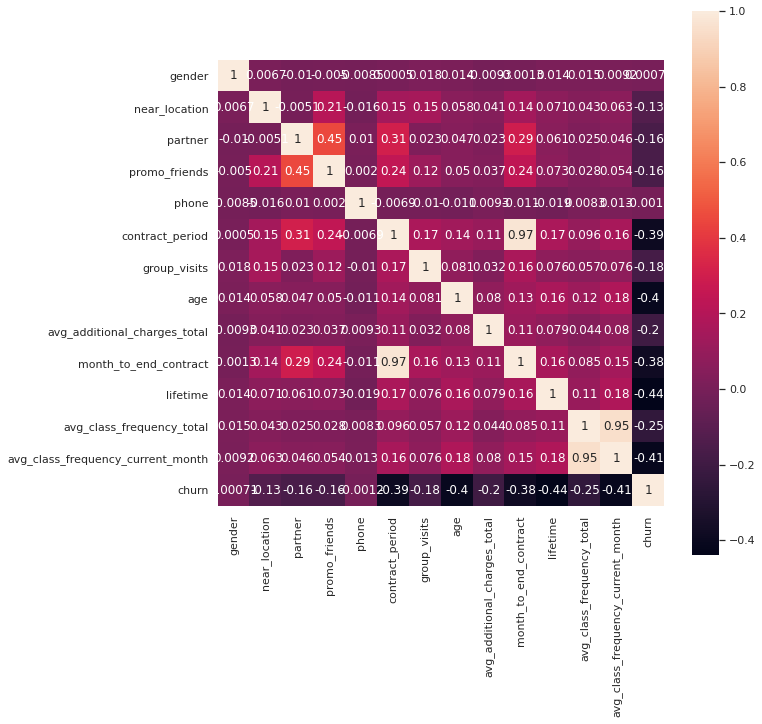

In [ ]:
plt.figure(figsize=(10,10))
corr = sns.heatmap(corr_m, square=True, annot=True)
plt.show

Логичные выводы - отток больше всего коррелирует со временем с первого посещения клуба, сроком договора, посещением занятий за последний месяц, а также возрастом клиента. Пол и наличие номера телефона не коррелируют ни с одним из признаков.

## Шаг 3. Модель прогнозирования оттока пользователей <a id="model"></a>

Разделим столбцы на обучающую и валидационную группы.

In [ ]:
X = data.drop('churn', axis=1)

In [ ]:
y = data['churn']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#### Стандартизация

In [ ]:
scaler = StandardScaler() # создаём объект класса scaler
scaler.fit(X_train)  # обучаем стандартизатор
X_train_st = scaler.transform(X_train) # преобразуем набор данных 
X_test_st = scaler.transform(X_test) # преобразуем набор данных 

### 3.1 Обучение модели <a id="teaching"></a>

#### Логистическая регрессия

In [ ]:
lr_model = LogisticRegression(solver='liblinear', random_state=0) 

In [ ]:
# обучим модель
lr_model.fit(X_train_st, y_train)

# воспользуемся уже обученной моделью, чтобы сделать прогнозы
lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test_st)[:, 1]

#### Случайный лес

In [ ]:
tree_model = RandomForestClassifier(n_estimators = 100, random_state=0)
tree_model.fit(X_train_st, y_train)
tree_predictions = tree_model.predict(X_test_st)
tree_probabilities = tree_model.predict_proba(X_test_st)[:,1]

## 3.2 Оценка метрик <a id="metrics"></a>

In [ ]:
print('Метрики для логистической регрессии')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, lr_predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, lr_predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, lr_predictions)))
print('F1: {:.2f}'.format(f1_score(y_test, lr_predictions)))
print('ROC_AUC: {:.2f}\n'.format(roc_auc_score(y_test, lr_probabilities)))

Метрики для логистической регрессии
Accuracy: 0.92
Precision: 0.85
Recall: 0.83
F1: 0.84
ROC_AUC: 0.97



In [ ]:
print('Метрики для случайного леса')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, tree_predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, tree_predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, tree_predictions)))
print('F1: {:.2f}'.format(f1_score(y_test, tree_predictions)))
print('ROC_AUC: {:.2f}\n'.format(roc_auc_score(y_test, tree_probabilities)))

Метрики для случайного леса
Accuracy: 0.92
Precision: 0.84
Recall: 0.81
F1: 0.83
ROC_AUC: 0.97



Результаты неплохие, f1 выше 80%, цифры схожи, но все-таки немного лучше в модели логистической регрессии.

## Шаг 4. Кластеризация пользователей <a id="clustering"></a>

#### Стандартизация

In [ ]:
#уберем столбец 'churn'
data_cluster = data.drop(['churn'], axis=1)

In [ ]:
data_sc = scaler.fit_transform(data_cluster) # обучаем нормализатор и преобразуем набор данных

In [ ]:
linked = linkage(data_sc, method = 'ward') 

### 4.1 Дендрограмма  <a id="linkagematrix"></a>

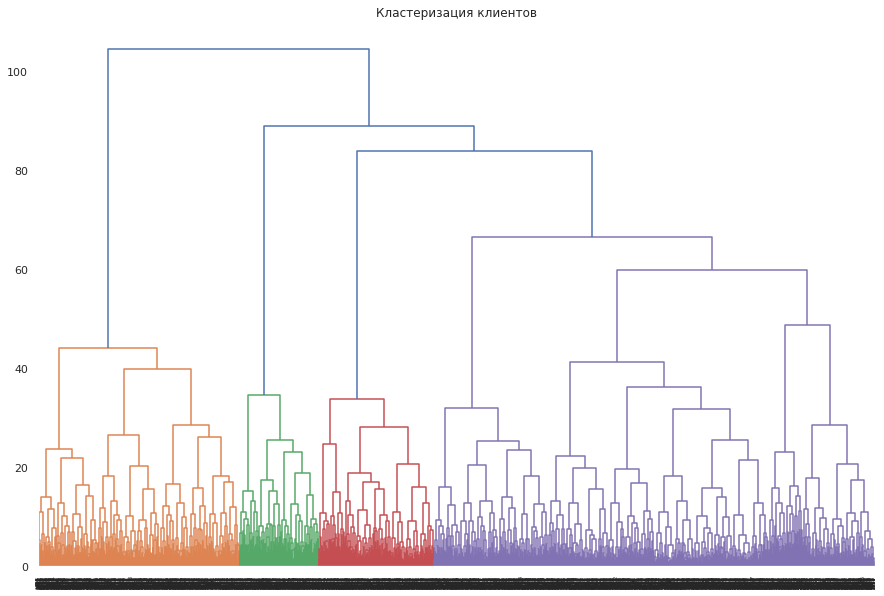

In [ ]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Кластеризация клиентов')
plt.show() 

На графике обозначено 4 кластера, и четвертый можно условно поделить пополам. По заданию мы обучаем модель кластеризации на числе 5 кластеров.

### 4.2 Обучение модели кластеризации <a id="kmeans"></a>

In [ ]:
km = KMeans(n_clusters=5, random_state=0) # задаём число кластеров, равное 5, и фиксируем значение random_state для воспроизводимости результата
labels = km.fit_predict(data_sc) # применяем алгоритм к данным и формируем вектор кластеров
data['clusters'] = labels

In [ ]:
data.clusters.value_counts()

3    1262
0    1010
4     838
2     505
1     385
Name: clusters, dtype: int64

In [ ]:
data.groupby('clusters').mean().T

clusters,0,1,2,3,4
gender,0.502970,0.522078,0.495050,0.485737,0.559666
near_location,0.959406,0.862338,0.000000,1.000000,0.976134
partner,0.783168,0.470130,0.463366,0.350238,0.356802
promo_friends,0.574257,0.306494,0.079208,0.240095,0.230310
phone,1.000000,0.000000,1.000000,1.000000,0.998807
contract_period,10.889109,4.787013,2.352475,1.948494,2.669451
group_visits,0.542574,0.425974,0.215842,0.341521,0.473747
age,29.982178,29.301299,28.477228,28.167987,30.125298
avg_additional_charges_total,160.761016,143.957664,135.457501,131.622204,161.657905
month_to_end_contract,9.954455,4.475325,2.198020,1.856577,2.459427


Самый многочисленный кластер (1262 клиента) - <B> третий</B>, в нем же выше всего процент оттока (51%). Все клиенты из этого кластера живут поблизости, оставили свой номер телефона, соотношение полов в нем примерно равное, а возраст чуть ниже, чем в целом по датасету. Треть этих клиентов пришли через компанию-партнер, четверть - через друзей, средний срок их абонемента - 2 месяца. Треть посещает групповые занятия, тратят на дополнительные услуги меньше всех и состоят в клубе 2,5 месяца, редко посещая больше 1 занятия в месяц.
Можно характеризовать таких клиентов как живущих близко к клубу и решивших купить короткий абонемент на пробу, которая, видимо, прошла не очень удачно.

Второй по численности (1010 человек) <B>кластер - 0</B>. Отток таких клиентов всего 2%. Для него характерны выдающаяся длительность абонемента - в среднем почти 11 месяцев, большой размер дополнительных трат, посещение в среднем 2 занятий в неделю. 78% из них посещают зал через партнера, 57% пришли через друга. Больше половины посещает групповые занятия и почти все проживают близко к спортзалу.  Скорее всего, это корпоративные клиенты, ведущие здоровые образ жизни, либо бывалые лояльные посетители, ведь в этом кластере в среднем являются членами клуба уже 4-5 месяцев, а до конца абонемента у большшинства осталось почти 10 месяцев.

Еще один кластер с низким оттоком (6%) и значительный по численности (838 клиентов) - <B>четвертый. </B> Эти посетители живут недалеко от зала, они старше клиентов в прочих кластерах и посещают клуб дольше - почти 5 месяцев в среднем. Почти половина из них посещает групповые занятия и вообще они довольно часто ходят в зал - почти 3 раза в неделю. На дополнительные услуги они тратят больше всех, и заключают договор почти на 3 месяца.

<B>Кластер №2</B> насчитывает 505 человек, никто из которых не живет близко к спортзалу. Их отток довольно значительный - 44%, половина посещает зал через компанию-партнера, всего 8% пришли через друзей, 20% посещают групповые занятия. Абонемент они купили на 2-3 месяца, членами клуба являются около 3 месяцев, посещая 1-2 занятия еженедельно.

И самый малочисленный кластер - <B>кластер №1 </B>(385 клиентов). Почти половина пришли через партнера, треть - через друзей, большинство проживают недалеко от спортзала, половина посещает групповые занятия. Они являются членами спортклуба около 4 месяцев, купили абонемент почти на 5 месяцев и посещают зал 1-2 раза в неделю. Отток в этом кластере - 27%.

### 4.3 Кластеры <a id="clusters"></a>

In [ ]:
clusters = data.clusters.unique()
clusters

array([1, 0, 3, 4, 2], dtype=int32)

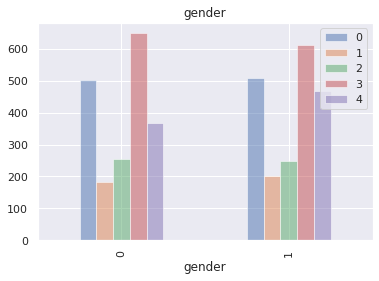

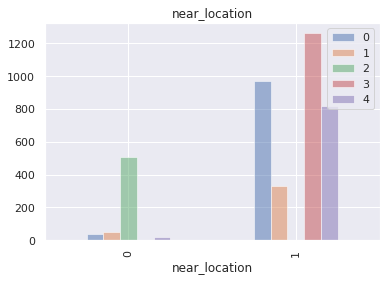

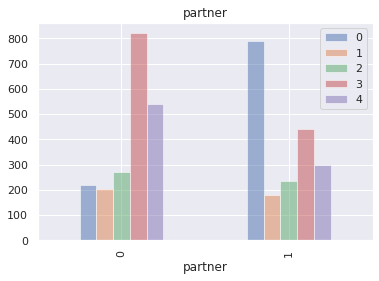

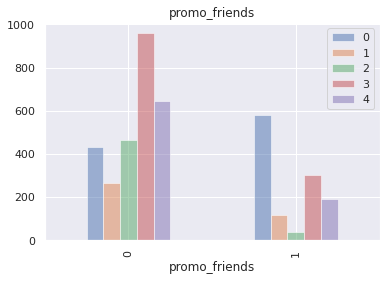

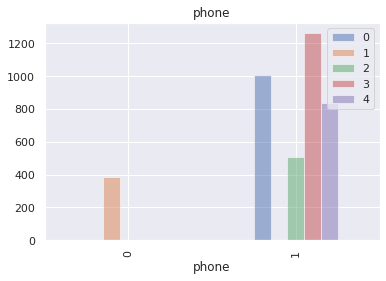

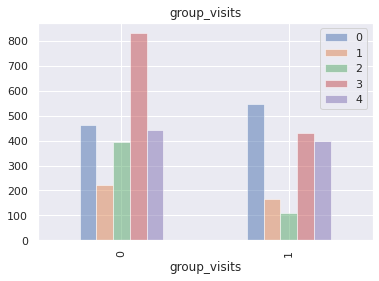

In [ ]:
for column in bool_columns:
    cluster_report = data.copy().reset_index().pivot_table(index = column, columns= data['clusters'], values='index', aggfunc='count' )
    cluster_report.plot(kind='bar', alpha=0.5, title=column).legend(['0', '1', '2', '3', '4'], loc='upper right')

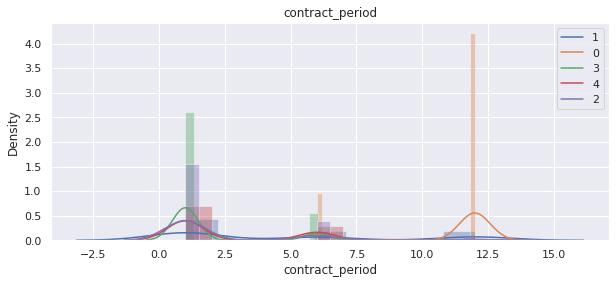

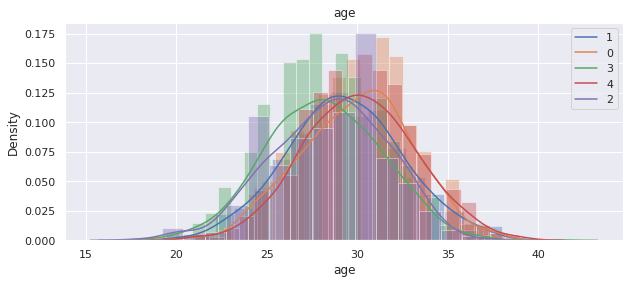

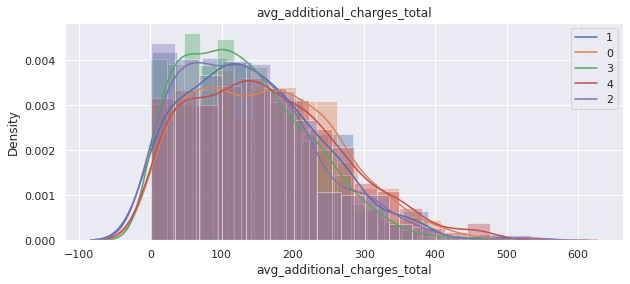

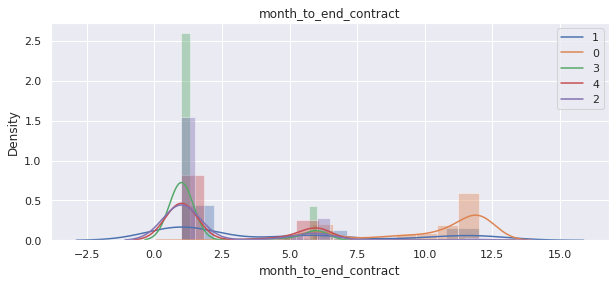

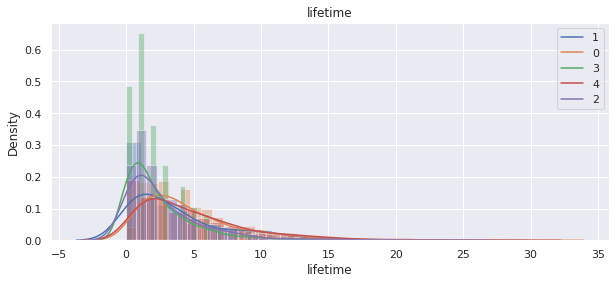

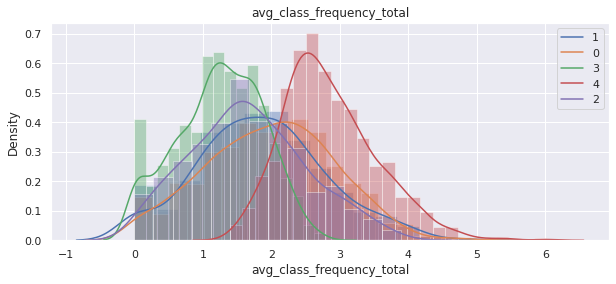

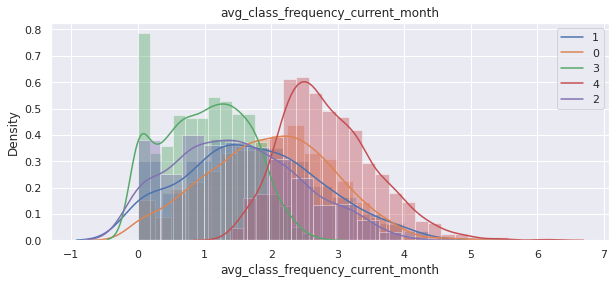

In [ ]:
for column in regular_columns: 
    plt.figure(figsize=(10,4)) 
    plt.title(column)
    for cluster in clusters:
        sns.distplot(data[data['clusters'] == cluster][column])
    plt.legend(clusters)
    plt.show()

Графиками подтверждаются уже сделанные выше выводы.

### 4.4 Отток по кластерам <a id="clusterchurn"></a>

In [ ]:
data.groupby('clusters')\
    .agg({'churn':'mean', 'gender':'count'})\
    .reset_index()\
    .rename(columns={'clusters':'Кластер', 'churn':'Отток','gender' : 'Число клиентов'})\
    .sort_values('Отток', ascending=False)

,Кластер,Отток,Число клиентов
3,3,0.514263,1262
2,2,0.443564,505
1,1,0.267532,385
4,4,0.068019,838
0,0,0.027723,1010


Опять же видим, что самый многочисленный кластер - третий - отличается самым высоким оттоком, а самый низкий отток - во втором по числу кластере, нулевом. 

## Шаг 5. Вывод <a id="summary"></a>

- Идеальным кластером можно считать нулевой - среднему клиенту от 29 до 33 лет, он живет недалеко от спортзала и посещает его через компанию-партнера (корпоративный клиент). Он начал ходить в спортклуб благодаря другу примерно 4,5 месяца назад, посещает зал 2 раза в неделю и ходит на групповые занятия. Также идеальные клиенты приобрели абонемент почти на год и активно пользуются дополнительными сервисами. Этот кластер довольно многочисленный и с низким оттоком, нужно уделять внимание таким клиентам, чтобы сохранить их лояльность.

- Противоположным случаем можно назвать 3 и 3 кластеры - они состоят из клиентов, пришедших в спортклуб на пробу, приобретя короткий абонемент и редко посещающих зал. Они редко приходят через друзей или компанию, не так часто посещают групповые занятия и используют дополнительные услуги. Возможно, стоит предложить им акции на более длительные абонементы или групповые занятия (чтобы они могли найти знакомых, с которыми вместе будут ходить в зал).

- Мы также видим меньшую склонность к оттоку среди сотрудников партнерских компаний, так что имеет смысл расширять партнерскую сеть и предлагать компаниям выгодные условия. Меньше уходят и те клиенты, которые пришли благодаря друзьям, что логично, в компании с другом мотивация посещать зал выше. Стоит расширять и эту программу лояльности.